In [8]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cv2
import h5py
import copy

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import print_wise
from data_preprocessing.preprocessing import format_in_trials, movie_paths #cut_excess_timepoints, create_bins, get_firing_rate, convert_gaze_coordinates


In [2]:
name = "paul" 
day = "0919"
experiment_name = f"{name}_25{day}"
resolution_Hz = 100
npx = False

data_path = f"{paths['data_formatted']}/{experiment_name}_experiment.mat"
if "red" in experiment_name: # red is saved differently also in the experiment.mat file
    exp_name_plx = experiment_name[:4] + "20" + experiment_name[4:]
    data_path = f"{paths['data_formatted']}/{exp_name_plx}_experiment.mat"
d = loadmat(data_path)
trials = d["Trials"]
stimuli = d["Stimuli"]
s = np.concatenate(stimuli["filename"])
file_list = [str(x[0]) for x in s]
print_wise(f"Start loading rasters of {experiment_name}...")
if npx == False:
    if "paul" in experiment_name:
        exp_name_plx = experiment_name[:5] + "20" + experiment_name[5:] # because plx saves files with 2025 instead of 25
    elif "red" in experiment_name:
        pass # we have already defined exp_name_plx
    rasters_path = f"{paths['data_formatted']}/{exp_name_plx}-rasters.h5"
    with h5py.File(rasters_path, "r") as f:
        rasters = f["rasters"][:]
elif npx == True:
    rasters_path = f"{paths['data_neuropixels']}/{experiment_name}/catgt_{experiment_name}_g0/{experiment_name}_g0_imec{imec}/{experiment_name}-imec{imec}-mua_cont.h5"
    with h5py.File(rasters_path, "r") as f:
        rasters = f["mua_cont"][:]
# end if npx == False:
print_wise("Finished loading rasters")



13:31:46 - Start loading rasters of paul_250919...
13:31:50 - Finished loading rasters


In [3]:
resolution_Hz = 100
len_window_firing_rate = 1000/resolution_Hz

In [4]:
neural_dict, gaze_dict = format_in_trials(paths, file_list, len_window_firing_rate, rasters, trials, stimuli)

13:31:51 - Warning, stevetoblondie.mp4 doesn't have any successful trial
13:31:51 - Warning! stevetoalle.mp4 has different time-points across trials [1204, 1204, 1206, 1204, 1206]
13:31:51 - Warning, stevetoblondie.mp4 doesn't have any successful trial
13:31:51 - Warning! stevetoalle.mp4 has different time-points across trials [1204, 1204, 1206, 1204, 1206]


In [33]:
import os
os.listdir(f"{paths['livingstone_lab']}/Stimuli/movies/occluded_videos")

['YDXJ0090.MP4',
 'YDXJ0085.MP4',
 'YDXJ0094.MP4',
 'YDXJ0088.MP4',
 'YDXJ0093.MP4',
 'YDXJ0092.MP4',
 'YDXJ0087.MP4',
 'YDXJ0086.MP4',
 'Thumbs.db',
 'YDXJ0097.MP4',
 'YDXJ0091.MP4',
 'YDXJ0100.MP4',
 'YDXJ0096.MP4',
 'YDXJ0099.MP4',
 'YDXJ0095.MP4']

In [31]:
a = ["a", "b", "c", "d", "e"]
b = ["f", "a", "x", "r"]
if any(el in a for el in b):
    print("a")
else:
    print("missed")

a


In [19]:
fn = "steve1toAlle_rev.mp4"
movies_folder = movie_paths(paths, list(neural_dict.keys()))
video_path = f"{movies_folder}/{fn}"
cap = cv2.VideoCapture(video_path)



In [20]:
video = []
counter = 0
while True:
    counter += 1
    ret, frame = cap.read()
    if not ret:
            print(f"breaking at {counter}")
            break
    frame = np.array(frame, dtype=np.uint8)  
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    video.append(frame)

breaking at 374


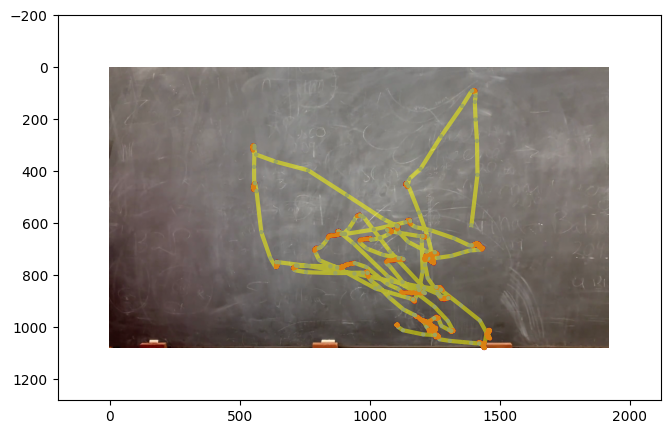

In [21]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

eyes = gaze_dict[fn][:,:,0]
for i in range(0, eyes.shape[1], 3):
    fig, ax = plt.subplots(figsize=(8, 5))  # create a figure and axes
    ax.imshow(video[int(i//3.3)])
    ax.plot(eyes[0, :i], eyes[1, :i], color='yellow', linewidth=3, alpha=0.5)
    sc = ax.scatter(
        eyes[0, :i], eyes[1, :i],
        c=eyes[2, :i], cmap='coolwarm', s=10, edgecolors='none'
    )
    ax.set_xlim(-200, 2120)
    ax.set_ylim(-200, 1280)
    ax.invert_yaxis()
    plt.pause(0.01)
    plt.close(fig)  # now this works
    clear_output(wait=True)

In [22]:
import pickle

a = "/Volumes/LivingstoneLab/tiziano/data/neural_red_250820_plx_100Hz.pkl"
with open(a, "rb") as f:
    pkl_dict = pickle.load(f)

print(f"Loaded object type: {type(pkl_dict)}")
if isinstance(pkl_dict, dict):
    print(f"Keys ({len(pkl_dict)}): {list(pkl_dict.keys())[:50]}")

Loaded object type: <class 'dict'>
Keys (9): ['YDXJ0099.MP4', 'YDXJ0087.MP4', 'YDXJ0096.MP4', 'YDXJ0086.MP4', 'YDXJ0095.MP4', 'YDXJ0088.MP4', 'YDXJ0090.MP4', 'YDXJ0091.MP4', 'YDXJ0094.MP4']


In [23]:
for k in pkl_dict.keys():
    print(pkl_dict[k].shape)

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
